# 07. Multi Agent Basic


In [2]:
import os

from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import AzureOpenAIChatCompletionClient
from dotenv import load_dotenv

load_dotenv()

api_version = os.getenv("AZURE_OPENAI_API_VERSION")
api_key = os.getenv("AZURE_OPENAI_KEY")
azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
deployment_name = os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME")
azure_openai_chat_completion_client = AzureOpenAIChatCompletionClient(
            model=deployment_name,
            azure_endpoint=azure_endpoint,
            api_version=api_version,
            api_key=api_key,
        )

# Define a tool
async def get_weather(city: str) -> str:
    return f"The weather in {city} is 73 degrees and Sunny."


async def main() -> None:
    # Define an agent
    weather_agent = AssistantAgent(
        name="weather_agent",
        model_client=azure_openai_chat_completion_client,
        tools=[get_weather],
    )

    # Define a team with a single agent and maximum auto-gen turns of 1.
    agent_team = RoundRobinGroupChat([weather_agent], max_turns=1)

    while True:
        # Get user input from the console.
        user_input = input("Enter a message (type 'exit' to leave): ")
        if user_input.strip().lower() == "exit":
            break
        # Run the team and stream messages to the console.
        stream = agent_team.run_stream(task=user_input)
        await Console(stream)


# NOTE: if running this inside a Python script you'll need to use asyncio.run(main()).
await main()

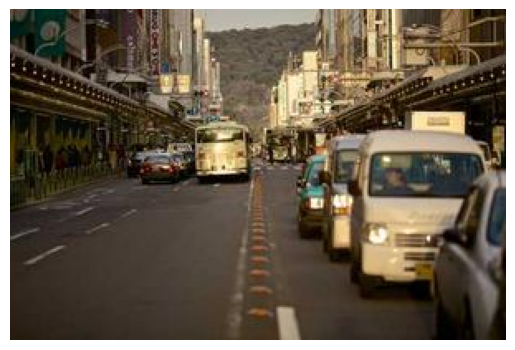

['The image depicts a street scene likely in an urban area, featuring a mix of vehicles including a bus and various cars. The street is lined with shops and buildings on either side, indicating a commercial district. The setting appears to be during the late afternoon or early evening, with soft lighting highlighting the scenery. There are marked lanes on the road, suggesting organized traffic flow. The background shows a hill or greenery, contributing to the overall cityscape.']
id='ff8cf540-40ae-4695-a3a2-52c46a136e0e' source='assistant' models_usage=RequestUsage(prompt_tokens=8528, completion_tokens=89) metadata={} created_at=datetime.datetime(2025, 10, 2, 6, 27, 7, 216067, tzinfo=datetime.timezone.utc) content='The image depicts a street scene likely in an urban area, featuring a mix of vehicles including a bus and various cars. The street is lined with shops and buildings on either side, indicating a commercial district. The setting appears to be during the late afternoon or early

In [3]:
from autogen_agentchat.messages import TextMessage

text_message = TextMessage(content="Hello, world!", source="User")

from io import BytesIO

import matplotlib.pyplot as plt
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import CancellationToken
from autogen_core import Image as AGImage
from PIL import Image

pil_image = Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = AGImage(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")
plt.imshow(pil_image) 
plt.axis('off') 
plt.show()

agent = AssistantAgent(
    name="assistant",
    model_client=azure_openai_chat_completion_client,
    system_message="Use tools to solve tasks.",
)

async def assistant_run() -> None:
    response = await agent.on_messages(
        [multi_modal_message],
        cancellation_token=CancellationToken(),
    )

    print([response.chat_message.content])

    print(response.chat_message)



# Use asyncio.run(assistant_run()) when running in a script.
await assistant_run()

In [4]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken


# Define a tool that searches the web for information.
async def web_search(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."


# Create an agent that uses the OpenAI GPT-4o model.
model_client = azure_openai_chat_completion_client
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)

async def assistant_run() -> None:
    response = await agent.on_messages(
        [TextMessage(content="Find information on AutoGen", source="user")],
        cancellation_token=CancellationToken(),
    )
    print(response.inner_messages)
    print(response.chat_message.content)


# Use asyncio.run(assistant_run()) when running in a script.
await assistant_run()

[ToolCallRequestEvent(id='af18c719-2b8c-4549-bbac-b0bec2ebf580', source='assistant', models_usage=RequestUsage(prompt_tokens=61, completion_tokens=16), metadata={}, created_at=datetime.datetime(2025, 10, 2, 6, 27, 12, 191709, tzinfo=datetime.timezone.utc), content=[FunctionCall(id='call_7ls197Ewn9tl14xXte1ASOkQ', arguments='{"query":"AutoGen"}', name='web_search')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(id='b42fe92d-a82e-4851-850a-1f486bb9a266', source='assistant', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 10, 2, 6, 27, 12, 192323, tzinfo=datetime.timezone.utc), content=[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_7ls197Ewn9tl14xXte1ASOkQ', is_error=False)], type='ToolCallExecutionEvent')]
AutoGen is a programming framework for building multi-agent applications.


In [6]:
from autogen_agentchat.agents import UserProxyAgent
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken


async def user_proxy_run() -> None:
    user_proxy_agent = UserProxyAgent("user_proxy")
    response = await user_proxy_agent.on_messages(
        [TextMessage(content="What is your name? ", source="user")], cancellation_token=CancellationToken()
    )
    print(f"Your name is {response.chat_message.content}")


# Use asyncio.run(user_proxy_run()) when running in a script.
await user_proxy_run()

Your name is hi


In [7]:
from autogen_agentchat.ui import Console


async def assistant_run_stream() -> None:
    # Option 1: read each message from the stream (as shown in the previous example).
    # async for message in agent.on_messages_stream(
    #     [TextMessage(content="Find information on AutoGen", source="user")],
    #     cancellation_token=CancellationToken(),
    # ):
    #     print(message)

    # Option 2: use Console to print all messages as they appear.
    await Console(
        agent.on_messages_stream(
            [TextMessage(content="Find information on AutoGen", source="user")],
            cancellation_token=CancellationToken(),
        )
    )


# Use asyncio.run(assistant_run_stream()) when running in a script.
await assistant_run_stream()

---------- ToolCallRequestEvent (assistant) ----------
[FunctionCall(id='call_CzVUjKDySX0P4dOUefoDLSNn', arguments='{"query":"AutoGen framework"}', name='web_search')]
---------- ToolCallExecutionEvent (assistant) ----------
[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_CzVUjKDySX0P4dOUefoDLSNn', is_error=False)]
---------- assistant ----------
AutoGen is a programming framework for building multi-agent applications.


In [8]:
from autogen_core.memory import ListMemory, MemoryContent, MemoryMimeType

# Initialize user memory
user_memory = ListMemory()

# Add user preferences to memory
await user_memory.add(MemoryContent(content="난 고양이를 좋아해", mime_type=MemoryMimeType.TEXT))

await user_memory.add(MemoryContent(content="내 생일은 7월 31 일이야", mime_type=MemoryMimeType.TEXT))

assistant_agent = AssistantAgent(
    name="assistant_agent",
    model_client=azure_openai_chat_completion_client,
    memory=[user_memory],
)

stream = assistant_agent.run_stream(task="내 생일은 언제야? 내가 좋아하는 애완동물은?")
await Console(stream)

---------- TextMessage (user) ----------
내 생일은 언제야? 내가 좋아하는 애완동물은?
---------- MemoryQueryEvent (assistant_agent) ----------
[MemoryContent(content='난 고양이를 좋아해', mime_type=<MemoryMimeType.TEXT: 'text/plain'>, metadata=None), MemoryContent(content='내 생일은 7월 31 일이야', mime_type=<MemoryMimeType.TEXT: 'text/plain'>, metadata=None)]
---------- TextMessage (assistant_agent) ----------
내 생일은 7월 31일이고, 내가 좋아하는 애완동물은 고양이야. TERMINATE


TaskResult(messages=[TextMessage(id='b8ad3cc0-eb01-48bf-8f3f-0a27728a5d5f', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 10, 2, 6, 28, 24, 235634, tzinfo=datetime.timezone.utc), content='내 생일은 언제야? 내가 좋아하는 애완동물은?', type='TextMessage'), MemoryQueryEvent(id='a5f38704-c10b-4499-9cf6-1cbb2276f6ad', source='assistant_agent', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 10, 2, 6, 28, 24, 240013, tzinfo=datetime.timezone.utc), content=[MemoryContent(content='난 고양이를 좋아해', mime_type=<MemoryMimeType.TEXT: 'text/plain'>, metadata=None), MemoryContent(content='내 생일은 7월 31 일이야', mime_type=<MemoryMimeType.TEXT: 'text/plain'>, metadata=None)], type='MemoryQueryEvent'), TextMessage(id='d7674046-68fc-4223-89a3-ad636dd7c9ce', source='assistant_agent', models_usage=RequestUsage(prompt_tokens=88, completion_tokens=28), metadata={}, created_at=datetime.datetime(2025, 10, 2, 6, 28, 25, 726797, tzinfo=datetime.timezone.utc), content='내 생일은 7월 31일이고, 